# <h1><center>**`Employee Salaries Project`**</center></h1>

### **`Problem Statement`**

To predict the salary of employee based on the information provided in the dataset. It's a dataset with 1 million records

- ### `How will the company profit from this solution?`
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

- ### `How will the employee profit from this solution?`

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.



Dataset link: https://www.kaggle.com/datasets/pavanelisetty/salarypredictions
### `Dataset Desciption`

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.simplefilter('always', FitFailedWarning)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
# Load the train_dataset, train_salaries, test_dataset
train_data = pd.read_csv("E:/Praxis/Project_Folder/Regression Proj/Regression Project/train_dataset.csv")
train_data_salaries = pd.read_csv("E:/Praxis/Project_Folder/Regression Proj/Regression Project/train_salaries.csv")
test_data = pd.read_csv("E:/Praxis/Project_Folder/Regression Proj/Regression Project/test_dataset.csv")

In [3]:
# print head of train data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
# print head of train data salaries
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
# print test head
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
# Adding salary data to train_dataset

train_data = train_data.merge(train_data_salaries,on='jobId',how='inner')

In [7]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [8]:
# get all column names

train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [9]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [10]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [11]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  

train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [12]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns

test_data.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


## Get the total number of samples in the dataset

In [13]:
# len of train and test dataset
print('train data length:',len(train_data))
print('test data length:',len(test_data))

train data length: 1000000
test data length: 1000000


## Get unique values

In [14]:
# get how many unique values are in train_dataset
train_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

### Checking different categories of the categorical columns

In [15]:
train_data['jobType'].value_counts()

jobType
SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: count, dtype: int64

In [16]:
train_data['degree'].value_counts()

degree
HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: count, dtype: int64

In [17]:
train_data['major'].value_counts()

major
NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: count, dtype: int64

In [18]:
train_data['industry'].value_counts()

industry
WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: count, dtype: int64

In [19]:
# get how many unique values are in test_dataset
test_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

## Counting the total number of missing values¶

In [20]:
# Check for missing values in all the columnns of the train_dataset
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [21]:
 # Check for missing values in all the columnns of the test_dataset
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

#### By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data ( Those are unique values and doesn't contribute in model building)

In [22]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(['jobId','companyId'],axis = 1)
train_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [23]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(['jobId','companyId'],axis = 1)
test_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [24]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_column = train_data.select_dtypes(exclude=np.number).columns.tolist()
numerical_column = train_data.select_dtypes(include=np.number).columns.tolist()

In [25]:
print(categorical_column)
print(numerical_column)

['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


## Correlation Matrix

### A correlation matrix is a table showing correlation coefficients between variables.

<AxesSubplot:>

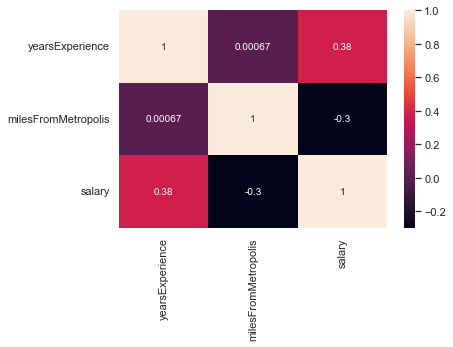

In [26]:
# Correlation metrix using pandas
corr = train_data.corr(numeric_only=True)
sns.heatmap(train_data.corr(numeric_only=True),annot = True)

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

## Chi-square Test

In [27]:
# import necessary libraries for chi-square test

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f= (no_of_rows-1) * (no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([((o-e)**2)/e for o,e in zip (observed_values,expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value= chi2.ppf(q = 1- alpha,df = degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1 - chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [28]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset

for x in categorical_column:
    for i in categorical_column:
        if i != x:
            print('chii square test on: ', x ,"  ", i,'\n')
            perform_chi_square_test(x,i)
            print("....................................................................,\n")

chii square test on:  jobType    degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  50117.72406771936
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
....................................................................,

chii square test on:  jobType    major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16703.025256041707
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
....................................................................,

chii square test on:  jobType    industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  14.913329934821567
critical_value: 58.12403768086803
p-value: 0.9999643570205455
Retain H0,There is no relationship betw

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot

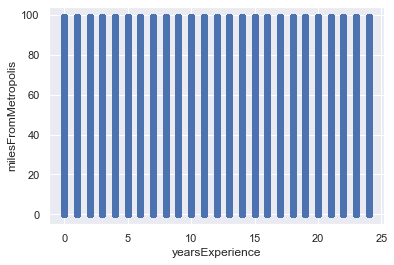

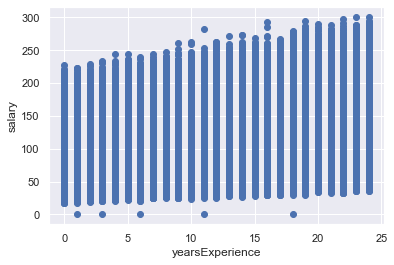

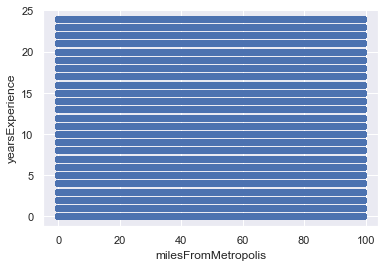

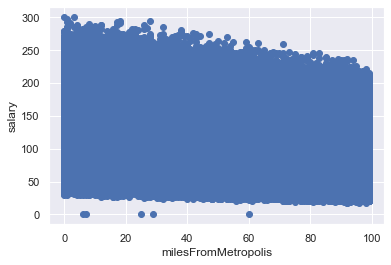

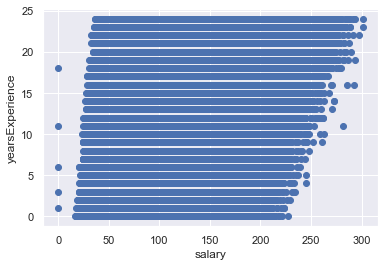

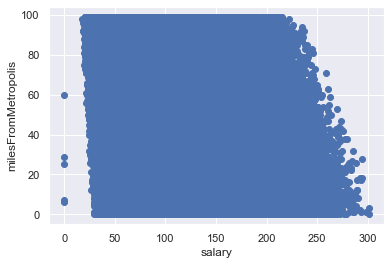

In [29]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x],train_data[y])
    plt.show()
# Loop through the different columns 
for i in numerical_column:
    for j in numerical_column:
        if i != j:
            plot_scatter(i,j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram

array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

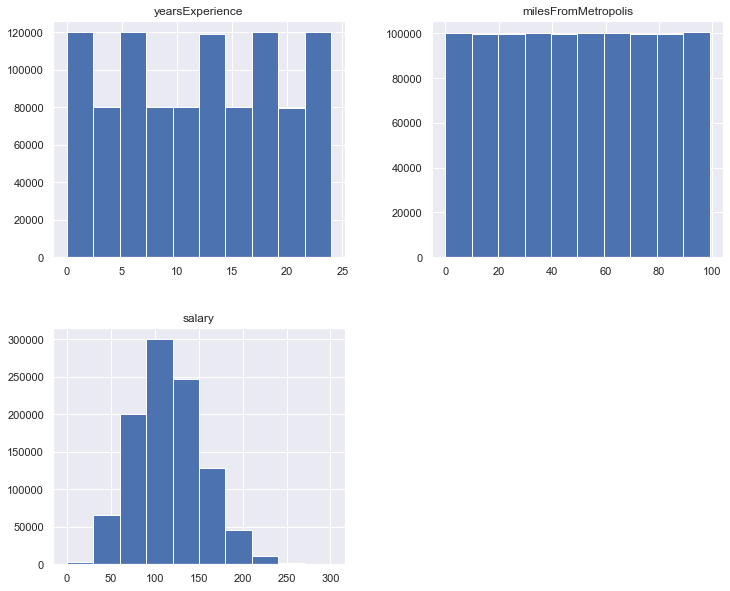

In [30]:
# Histogram using pandas 
train_data.hist(figsize=(12,10))

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


### Distribution of the Categorical variables using Bar plot and groupby operation

<AxesSubplot:xlabel='jobType'>

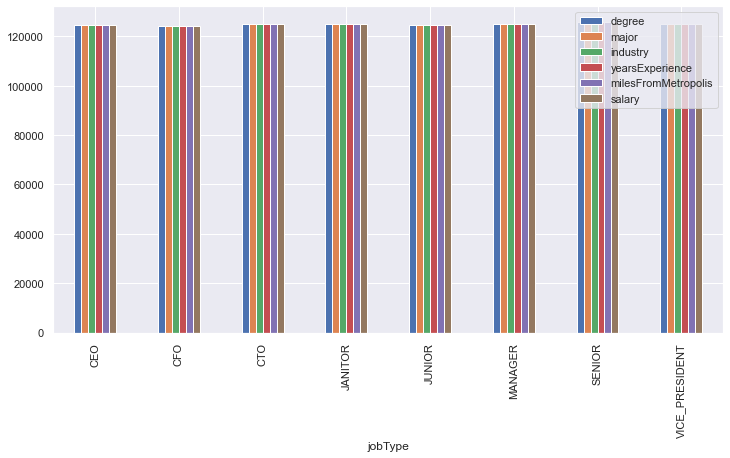

In [31]:
# goup data by jobType and plot count plot
train_data.groupby('jobType').count().plot(kind='bar',figsize=(12,6))

from above graph:
1. All data for each jobType is distributed equally.

<AxesSubplot:xlabel='degree'>

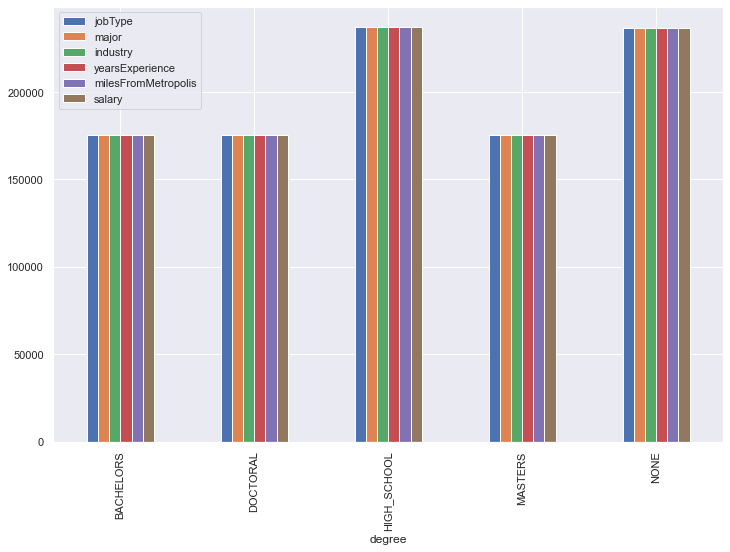

In [32]:
# goup data by degree and plot count plot
train_data.groupby('degree').count().plot(kind='bar',figsize=(12,8))

From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

<AxesSubplot:xlabel='major'>

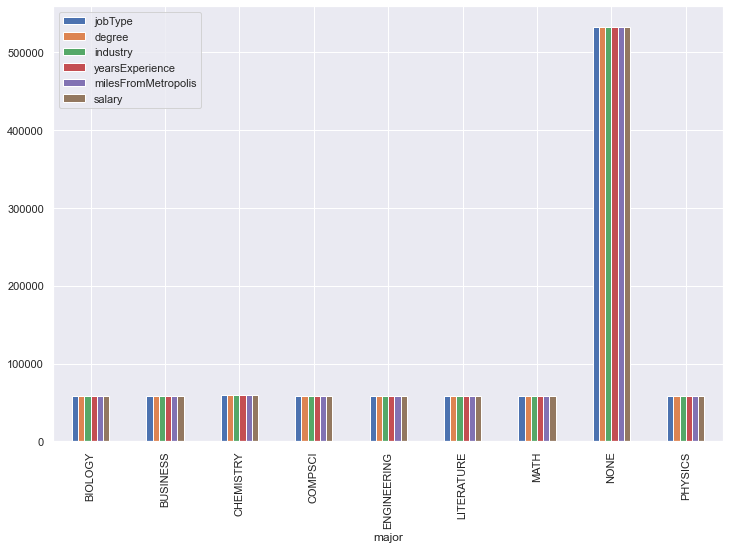

In [33]:
# goup data by major and plot count plot
train_data.groupby('major').count().plot(kind='bar',figsize=(12,8))

From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's


<AxesSubplot:xlabel='industry'>

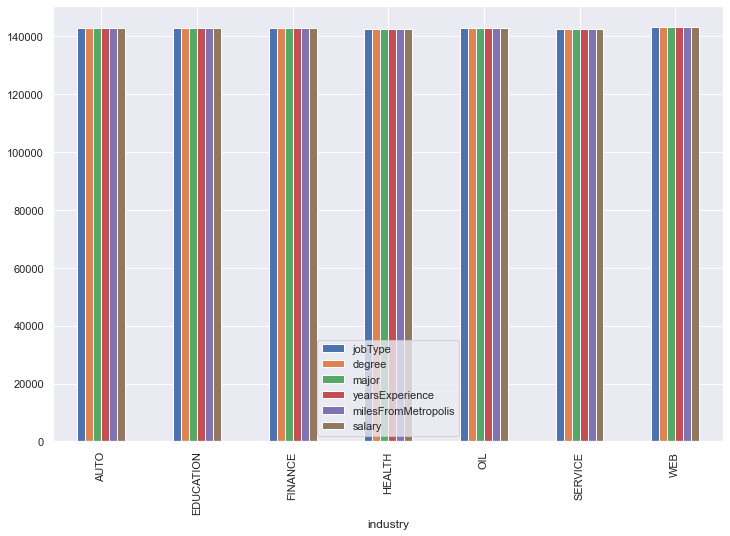

In [34]:
# goup data by industry and plot count plot
train_data.groupby('industry').count().plot(kind='bar',figsize=(12,8))

from above graph:
1. All data for each industry is distributed equally.

## Box Plot

<AxesSubplot:>

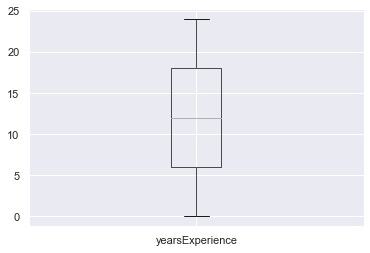

In [35]:
# box plot for yearsExperience column
train_data.boxplot(column='yearsExperience',figsize=(6,4))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

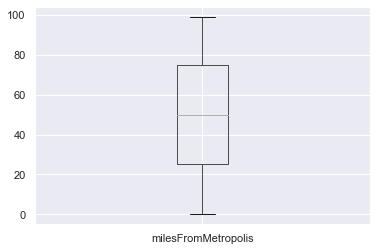

In [36]:
# box plot for milesFromMetropolis column
train_data.boxplot(column='milesFromMetropolis',figsize=(6,4))

from above box plot graph:

- Miles from Metropolis
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<AxesSubplot:>

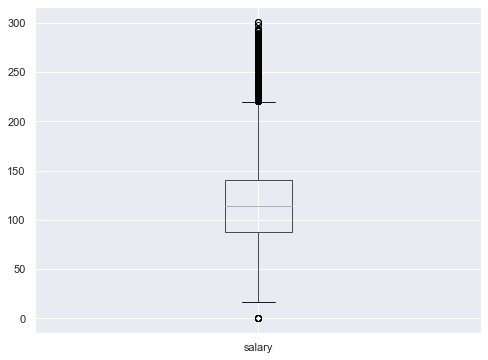

In [37]:
#box plot for salary column
train_data.boxplot(column='salary', figsize=(8,6))

from above box plot graph:

- Salary
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The median salary is around 114

### Some more visualization

<AxesSubplot:xlabel='jobType', ylabel='salary'>

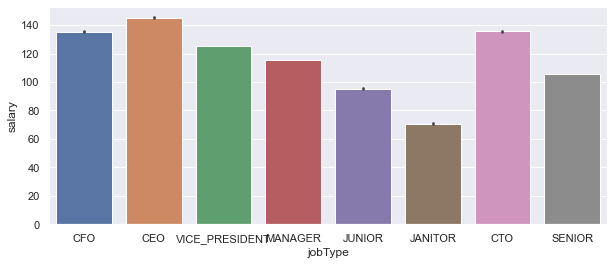

In [38]:
## salary as per job type 
plt.figure(figsize=(10,4))
sns.barplot(data = train_data,x='jobType',y='salary')

The Average salary of CEO is highest. After that there is Average salary of CTO and CFO

<AxesSubplot:xlabel='degree', ylabel='salary'>

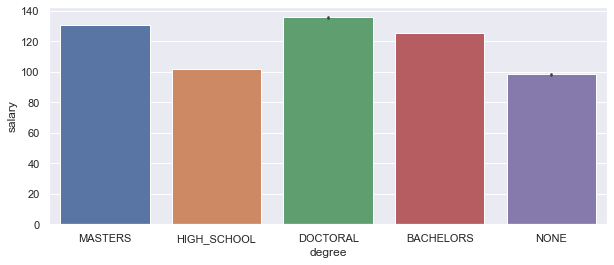

In [39]:
## salary as per degree 
plt.figure(figsize=(10,4))
sns.barplot(data = train_data,x='degree',y='salary')

The average salary of doctoral degree is highest

<AxesSubplot:xlabel='major', ylabel='salary'>

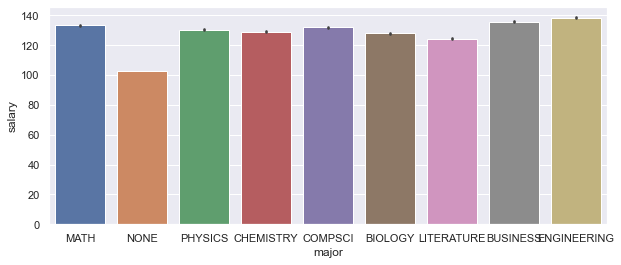

In [40]:
## salary as per major 
plt.figure(figsize=(10,4))
sns.barplot(data = train_data,x='major',y='salary')

As per major ,, if we exclude NONE type,, for all other majors the average salary is symmetrical

<AxesSubplot:xlabel='industry', ylabel='salary'>

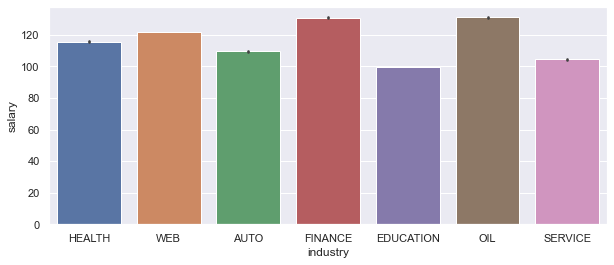

In [41]:
## salary as per industry 
plt.figure(figsize=(10,4))
sns.barplot(data = train_data,x='industry',y='salary')

Average salary of Finance and oil industry is higher compared to others

### Checking skewness of the target variable

<AxesSubplot:>

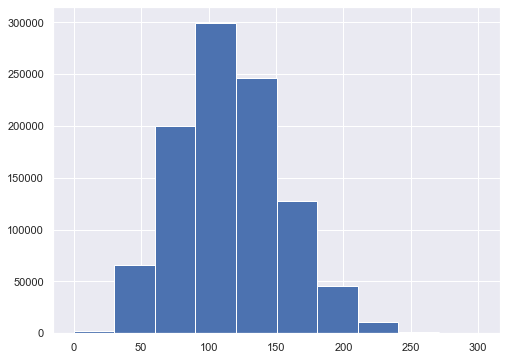

In [46]:
train_data['salary'].hist(figsize=(8,6))

In [47]:
print(train_data['salary'].skew())

0.346415074651208


Target variable is normally distributed.

## Variance inflation factor (VIF)

In [48]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'],axis = 1)

# target values
target = train_data['salary']

# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [49]:
train_for_vif.columns

Index(['yearsExperience', 'milesFromMetropolis'], dtype='object')

In [50]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  
  # firting the OLS model on y and x
  model = sm.OLS(y,x)
  results = model.fit() 
  
    # geting the r^2 value of results.
  rsq = results.rsquared
  
  # calculating vif value
  vif = round(1/(1-rsq),2)
  
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience columns is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.21 

R Square value of milesFromMetropolis columns is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.21 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1.  If we take the threshhold of VIF as 5 then there is not much multicolinearity of yearsExperience and milesFromMetropolis with other variables.

## Since, there are no missing values and all the data are distributed equally. We can start converting the categorical values to numerical.

## Encoding

In [51]:
# Importing OneHotEncoder for encoding the categorical data
train_data.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [52]:
## One hot encoding
train_data = pd.get_dummies(train_data,columns=['major','industry','jobType','degree'])
test_data = pd.get_dummies(test_data,columns=['major','industry','jobType','degree'])

In [53]:
train_data.head()

,yearsExperience,milesFromMetropolis,salary,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,...,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE
0,10,83,130,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3,73,101,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,10,38,137,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,8,17,142,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,8,16,163,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [54]:
test_data.head()

,yearsExperience,milesFromMetropolis,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,...,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE
0,22,73,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,20,47,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
2,17,9,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,14,96,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,10,44,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [55]:
# Split the labels and the target
train_X = train_data.drop(['salary'],axis=1)
train_Y = train_data['salary']

In [56]:
# Target
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [57]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X.iloc[1:100000],train_Y.iloc[1:100000],test_size=0.2,random_state=42)

## Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[['yearsExperience','milesFromMetropolis']] = scaler.fit_transform(X_train[['yearsExperience','milesFromMetropolis']])
X_test[['yearsExperience','milesFromMetropolis']] = scaler.transform(X_test[['yearsExperience','milesFromMetropolis']])

### OLS Model

In [59]:
train_X = sm.add_constant(train_X)
result = sm.OLS(train_Y.astype(float), train_X.astype(float)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                 1.074e+05
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:02:04   Log-Likelihood:            -4.3949e+06
No. Observations:             1000000   AIC:                         8.790e+06
Df Residuals:                  999972   BIC:                         8.790e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.89

## Linear Regression

In [60]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)
print("Train_accuracy for Linear Regression:", lr.score(X_train, Y_train))
print("R2 score for Linear Regression:", r2_score(Y_test, y_pred_lr))
print("RMSE for Linear Regression :",np.sqrt(mean_squared_error(Y_test, y_pred_lr)))

Train_accuracy for Linear Regression: 0.7425418416966341
R2 score for Linear Regression: 0.7428294546195111
RMSE for Linear Regression : 19.677767076430644


## KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

In [61]:
rmse=[]
for K in range(15):
    K = K+1
    knr = KNeighborsRegressor(n_neighbors = K)
    knr.fit(X_train, Y_train)
    y_pred_knr=knr.predict(X_test)
    error = np.sqrt(mean_squared_error(Y_test,y_pred_knr))
    rmse.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 26.748200874077494
RMSE value for k=  2 is: 23.382414332142865
RMSE value for k=  3 is: 22.05742505370924
RMSE value for k=  4 is: 21.458877679179775
RMSE value for k=  5 is: 21.12103060932397
RMSE value for k=  6 is: 20.8874570615956
RMSE value for k=  7 is: 20.782318991225722
RMSE value for k=  8 is: 20.70476686885776
RMSE value for k=  9 is: 20.672384334519183
RMSE value for k=  10 is: 20.686571912716712
RMSE value for k=  11 is: 20.704566699919244
RMSE value for k=  12 is: 20.778063627898533
RMSE value for k=  13 is: 20.85144285728854
RMSE value for k=  14 is: 20.948217716794048
RMSE value for k=  15 is: 21.04758024096832


In [62]:
knr = KNeighborsRegressor(n_neighbors=9)
knr.fit(X_train, Y_train)
y_pred_knr = knr.predict(X_test)
print("Train_accuracy for KNN Regression:", knr.score(X_train, Y_train))
print("R2 score for KNN Regression:", r2_score(Y_test, y_pred_knr))
print("RMSE for KNN Regression :",np.sqrt(mean_squared_error(Y_test, y_pred_knr)))

Train_accuracy for KNN Regression: 0.7727016394957571
R2 score for KNN Regression: 0.7161749414932841
RMSE for KNN Regression : 20.672384334519183


### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [63]:
## Using Randomsearch cv
def random_search(model,X_train,Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=4,random_state=42,n_jobs=-1,error_score='raise') 
    random.fit(X_train,Y_train)
    print(random.best_params_)

In [64]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
            "splitter":["best","random"],
            "max_depth" : list(range(1,32)),
           "min_samples_leaf":np.linspace(0.1, 0.9, 9, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           }
random_search(DecisionTreeRegressor(),X_train,Y_train,param_grid=DTR_para_grid)

{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.1, 'max_features': None, 'max_depth': 15}


In [65]:
dtr = DecisionTreeRegressor(splitter= 'random', min_weight_fraction_leaf= 0.1, min_samples_leaf= 0.1, max_features= None, max_depth= 15)
dtr.fit(X_train, Y_train)
y_pred_dtr = dtr.predict(X_test)
print("Train_accuracy for Decision Tree Regression:", dtr.score(X_train, Y_train))
print("R2 score for Decision Tree Regression:", r2_score(Y_test, y_pred_dtr))
print("RMSE of Decision Tree Regression :",np.sqrt(mean_squared_error(Y_test, y_pred_dtr)))

Train_accuracy for Decision Tree Regression: 0.3530483470247464
R2 score for Decision Tree Regression: 0.35739105092920964
RMSE of Decision Tree Regression : 31.105600312587267


### Important features for  Decision tree Regression

<function matplotlib.pyplot.show(close=None, block=None)>

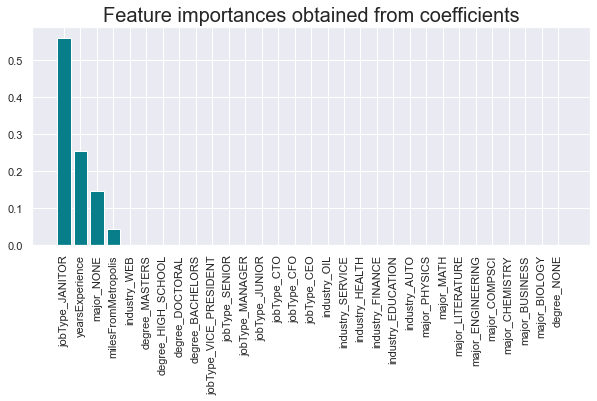

In [66]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': dtr.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,4))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show

### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

In [67]:
rf_para_grid = {'n_estimators': [1,2,4,8,16,32,64,100,200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(1,32)),
               'min_samples_split': list(range(1,32)),
               'min_samples_leaf': np.linspace(0.1,0.5,5,endpoint=True),
               'bootstrap': [True, False]}

random_search(RandomForestRegressor(),X_train,Y_train,param_grid=rf_para_grid)

{'n_estimators': 32, 'min_samples_split': 21, 'min_samples_leaf': 0.2, 'max_features': 'auto', 'max_depth': 7, 'bootstrap': False}


In [75]:
rfr = RandomForestRegressor(n_estimators= 32,min_samples_split= 21,min_samples_leaf= 0.2, max_features='auto', max_depth= 7, bootstrap= False)
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)
print("Train_accuracy of Random Forest Regression:", rfr.score(X_train,Y_train))
print("R2 score of Random Forest Regression:", r2_score(Y_test, y_pred_rfr))
print("RMSE of Random Forest Regression:",np.sqrt(mean_squared_error(Y_test, y_pred_rfr)))

Train_accuracy of Random Forest Regression: 0.24147140118016974
R2 score of Random Forest Regression: 0.24496767801182895
RMSE of Random Forest Regression: 33.71692613016949


### Important features for  Random Forest Regression

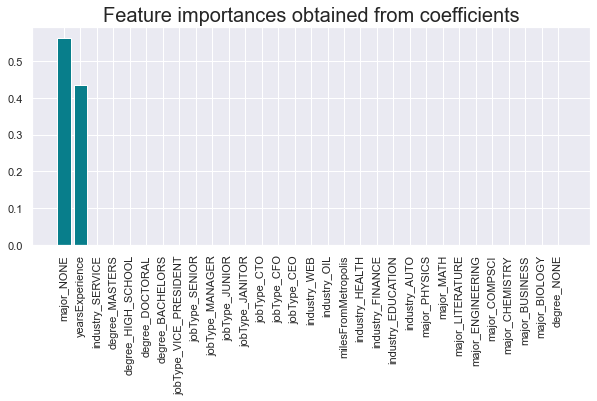

In [76]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rfr.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,4))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Now working with the test dataset provided

In [70]:
# test data 
test_X = test_data

In [71]:
# passing test data for scaling
test_X[['yearsExperience','milesFromMetropolis']] = scaler.transform(test_X[['yearsExperience','milesFromMetropolis']])

In [72]:
# Perforn the prediction on the test dataset
y_predicted = lr.predict(test_X)

In [73]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)

In [74]:
# predicted values in dataframe
predictions

,0
0,115.664062
1,92.742188
2,166.898438
3,105.320312
4,120.039062
...,...
999995,167.945312
999996,110.070312
999997,44.992188
999998,164.789062


### Conclusion
According to this model, the predicted value I got,
matches with the actual target values. Does the model is performing well.
Even though we use only 100000 samples, the model may perform much better when trained on complete dataset.
I have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.

using Linear regression and KNN regression it gives highest accuracy.